In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme()

In [2]:
#read csv
by_years=pd.read_csv('Coffee_company.csv', index_col=0)

In [ ]:
#check columns
by_years.columns=by_years.columns.str.strip()
by_years.columns

In [ ]:
by_years.head()

In [ ]:
#changed the date to string, then replace / with -
#format to datetime
by_years['Date']=by_years['Date'].astype(str).str.replace('/', '-')
by_years.head()
by_years['Date'] = pd.to_datetime(by_years['Date'], format='%d-%m-%Y')
by_years.head()

In [6]:
#check date type
print(by_years['Date'].dtype)

datetime64[ns]


In [7]:
#check profit data type and clean it
by_years['Profit'].astype(str)
by_years['Profit']=by_years['Profit'].str.replace('$', '').str.replace(',', '')

In [ ]:
#check table
by_years.head()

In [8]:
#group profit data by yearly quarters
by_years['Profit']=pd.to_numeric(by_years['Profit'], errors='coerce')
by_years['Date']=by_years['Date'].dt.to_period('Q')
grp_by=by_years.groupby('Date')['Profit'].sum()
grp_by.head()

Date
2021Q1    2735214.20
2021Q2    3350652.21
2021Q3    2863304.35
2021Q4    4621050.77
2022Q1    1914649.92
Freq: Q-DEC, Name: Profit, dtype: float64

<Axes: title={'center': 'Profit by Yearly Quarters'}, xlabel='Date', ylabel='Profit in $ Millions'>

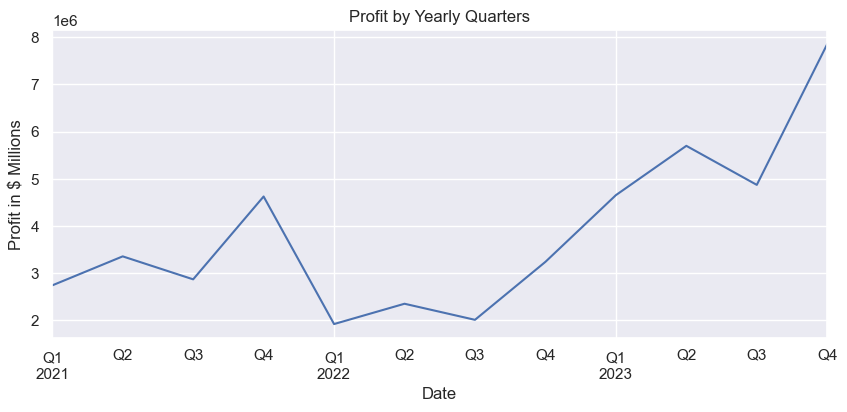

In [10]:
#plot profit
grp_by.plot(xlabel='Date', ylabel='Profit in $ Millions', title='Profit by Yearly Quarters', figsize=(10,4))